## check weights

In [3]:
import torch

In [2]:
pretrain = torch.load('epoch_149.pth',map_location=torch.device('cpu'))
#pretrain2 = torch.load('epoch_199.pth',map_location=torch.device('cpu'))


In [4]:
pretrain.keys()

odict_keys(['transformer.embeddings.position_embeddings', 'transformer.embeddings.hybrid_model.root.conv.weight', 'transformer.embeddings.hybrid_model.root.gn.weight', 'transformer.embeddings.hybrid_model.root.gn.bias', 'transformer.embeddings.hybrid_model.body.block1.unit1.gn1.weight', 'transformer.embeddings.hybrid_model.body.block1.unit1.gn1.bias', 'transformer.embeddings.hybrid_model.body.block1.unit1.conv1.weight', 'transformer.embeddings.hybrid_model.body.block1.unit1.gn2.weight', 'transformer.embeddings.hybrid_model.body.block1.unit1.gn2.bias', 'transformer.embeddings.hybrid_model.body.block1.unit1.conv2.weight', 'transformer.embeddings.hybrid_model.body.block1.unit1.gn3.weight', 'transformer.embeddings.hybrid_model.body.block1.unit1.gn3.bias', 'transformer.embeddings.hybrid_model.body.block1.unit1.conv3.weight', 'transformer.embeddings.hybrid_model.body.block1.unit1.downsample.weight', 'transformer.embeddings.hybrid_model.body.block1.unit1.gn_proj.weight', 'transformer.embeddin

In [60]:
model1 = pretrain['additionalCnn.cnn8.1.weight']
model2 = pretrain2['additionalCnn.cnn8.0.weight']
#print(model1 - model2)


## check training

In [2]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
def read_line_row(row):
    try:
        t = re.split('''iteration (\d*).{10}(\d*.\d*).{11}(\d*.\d*)''', row)
        return int(t[1]), float(t[2]), float(t[3])
    except IndexError:
        None
        
def visualize_log(log_file, step=100):
    i_list = []
    l_list = []
    ce_list = []
    with open(log_file) as f:
        for line in f:
            i = read_line_row(line)
            if (i != None):
                i_list.append(i[0])
                l_list.append(i[1])
                ce_list.append(i[2])
    df=pd.DataFrame({'i_list':i_list,'l_list':l_list, 'ce_list': ce_list})
    grouped = df.groupby(pd.cut(df["i_list"], np.arange(0, 20000, step))).mean()
    plt.plot(grouped.i_list, grouped.l_list)
    plt.title(log_file)
    plt.show()
    return (df, grouped)

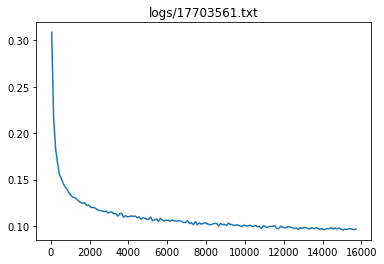

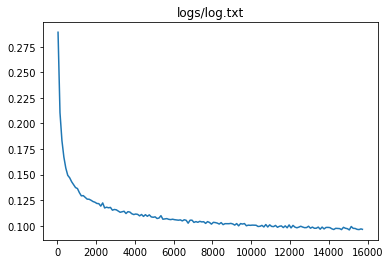

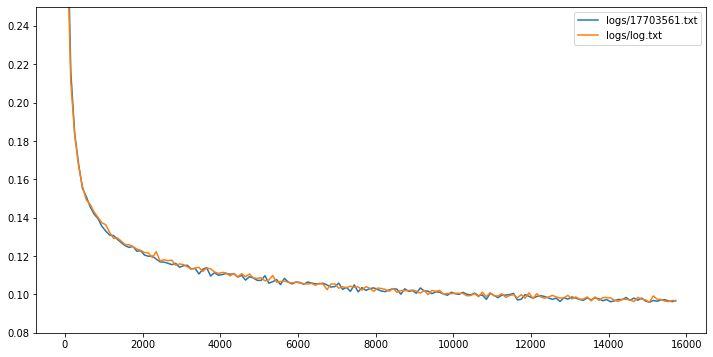

In [9]:
step = 100
file1 = 'logs/17703561.txt'
file2 = 'logs/log.txt'
(data, group1) = visualize_log(file1, step)
(data2, group2) = visualize_log(file2, step)
fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(group1.i_list, group1.l_list, label=file1)
plt.plot(group2.i_list, group2.l_list, label=file2)
plt.ylim([0.08,0.25])
plt.legend()
plt.show()